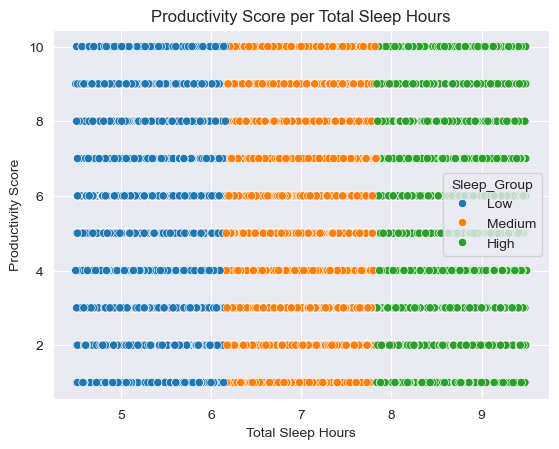

                      sum_sq      df         F   PR(>F)
C(Sleep_Group)     19.546038     2.0  1.184745  0.30591
Residual        41220.485762  4997.0       NaN      NaN


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('data/sleep_productivity.csv')

# Categories for total sleep hours
data['Sleep_Group'] = pd.cut(data['Total Sleep Hours'], bins=3, labels=['Low', 'Medium', 'High'])


sns.scatterplot(x='Total Sleep Hours', y='Productivity Score', hue='Sleep_Group', data=data)
plt.title('Productivity Score per Total Sleep Hours')
plt.show()

# 1. Define the OLS model
#    Formula notation: Dependent ~ Independent
data = data.rename(columns={'Productivity Score': 'ProductivityScore'})
model = ols('ProductivityScore ~ C(Sleep_Group)', data=data).fit()

# 2. Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)  # typ=2 is common for balanced data
print(anova_table)
data = data.rename(columns={'ProductivityScore': 'Productivity Score'})



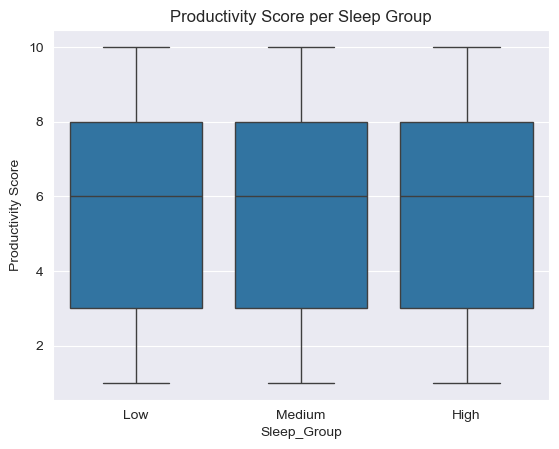

F-value: 1.1847452873746804
p-value: 0.30590995552500966


C:\Users\jelle\AppData\Local\Temp\ipykernel_22200\3530638803.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data.groupby('Sleep_Group')['Productivity Score'].apply(list)


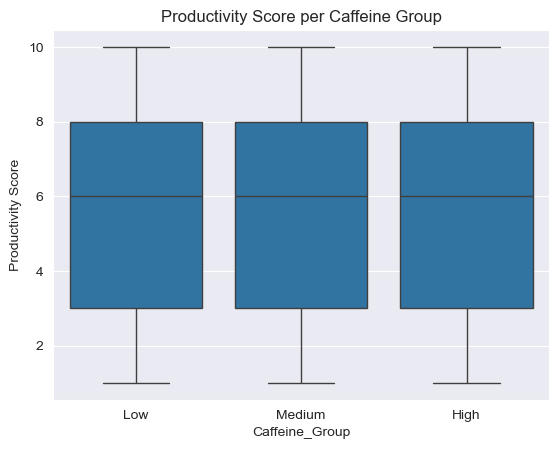

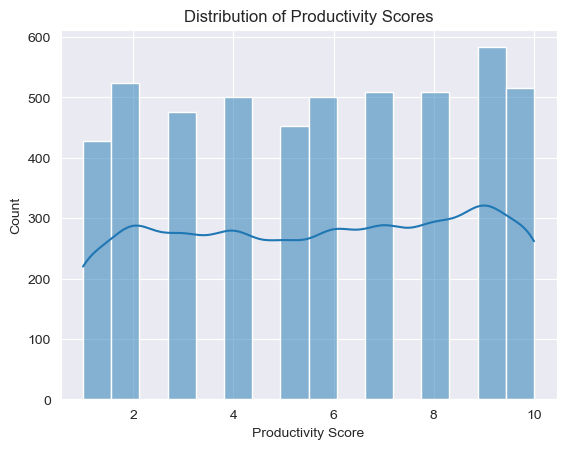

In [53]:

# Visualiseer de verdeling
sns.boxplot(x='Sleep_Group', y='Productivity Score', data=data)
plt.title('Productivity Score per Sleep Group')
plt.show()


# Groepeer de data per Sleep_Group en verzamel de scores
groups = data.groupby('Sleep_Group')['Productivity Score'].apply(list)

# ANOVA test
F, p = sp.stats.f_oneway(*groups)
print('F-value:', F)
print('p-value:', p)


data['Caffeine_Group'] = pd.cut(data['Caffeine Intake (mg)'], bins=3, labels=['Low', 'Medium', 'High'])

sns.boxplot(x='Caffeine_Group', y='Productivity Score', data=data)
plt.title('Productivity Score per Caffeine Group')
plt.show()

sns.histplot(data['Productivity Score'], kde=True)
plt.title('Distribution of Productivity Scores')
plt.show()



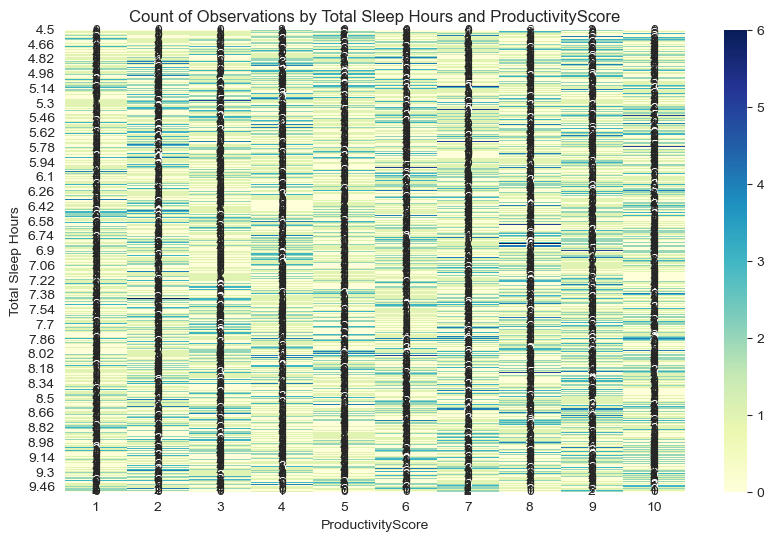

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into 'data'
# Create a crosstab of counts for each Total Sleep Hours and Productivity Score
count_data = pd.crosstab(data['Total Sleep Hours'], data['Productivity Score'])

plt.figure(figsize=(10, 6))
sns.heatmap(count_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Productivity Score")
plt.ylabel("Total Sleep Hours")
plt.title("Count of Observations by Total Sleep Hours and Productivity Score")
plt.show()


Correlation Matrix:
                       Total Sleep Hours  Caffeine Intake (mg)  \
Total Sleep Hours              1.000000              0.020274   
Caffeine Intake (mg)           0.020274              1.000000   
Productivity Score             0.018885              0.005058   

                      Productivity Score  
Total Sleep Hours               0.018885  
Caffeine Intake (mg)            0.005058  
Productivity Score              1.000000  


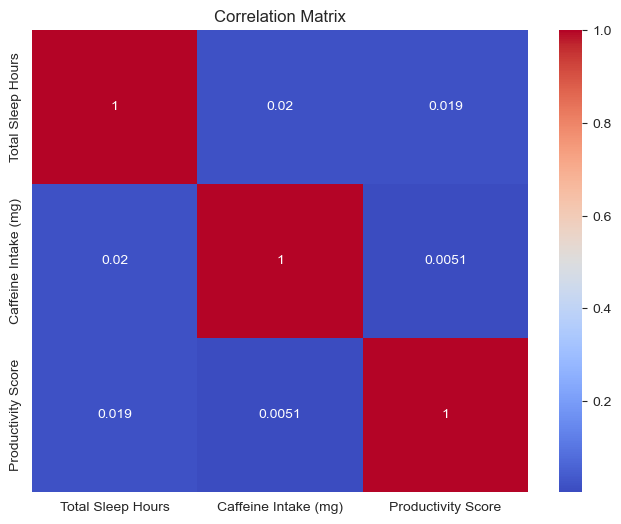

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the relevant columns
corr_matrix = data[['Total Sleep Hours', 'Caffeine Intake (mg)', 'Productivity Score']].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit a regression model
model = ols('Q("Productivity Score") ~ Q("Total Sleep Hours") + Q("Caffeine Intake (mg)")', data=data).fit()

# Print the summary of the regression model
print(model.summary())


# =============================================================================================
#                                 coef    std err          t      P>|t|      [0.025      0.975]
# ---------------------------------------------------------------------------------------------
# Intercept                     5.3624      0.210     25.589      0.000       4.952       5.773
# Q("Total Sleep Hours")        0.0371      0.028      1.328      0.184      -0.018       0.092
# Q("Caffeine Intake (mg)")     0.0002      0.000      0.331      0.741      -0.001       0.001




                               OLS Regression Results                              
Dep. Variable:     Q("Productivity Score")   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.9460
Date:                     Thu, 13 Mar 2025   Prob (F-statistic):              0.388
Time:                             13:41:48   Log-Likelihood:                -12369.
No. Observations:                     5000   AIC:                         2.474e+04
Df Residuals:                         4997   BIC:                         2.476e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------